In [1]:
import os
print(os.getcwd()) # This will print the working directory to which the Dataset should be uploaded

/content


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


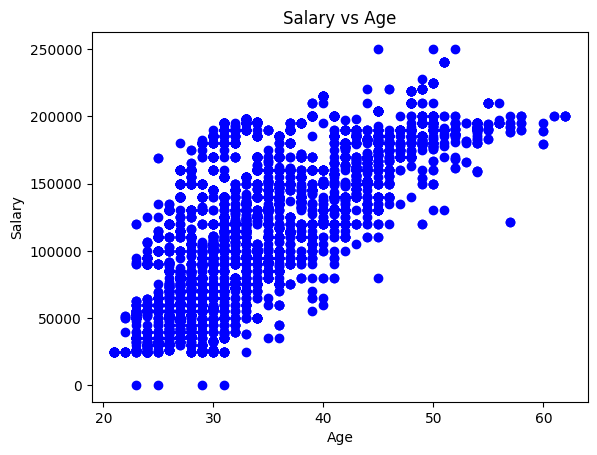

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object
Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64
Mean Squared Error (MSE): 1263045084.1374106
R-Squared Value: 0.5270715745473296


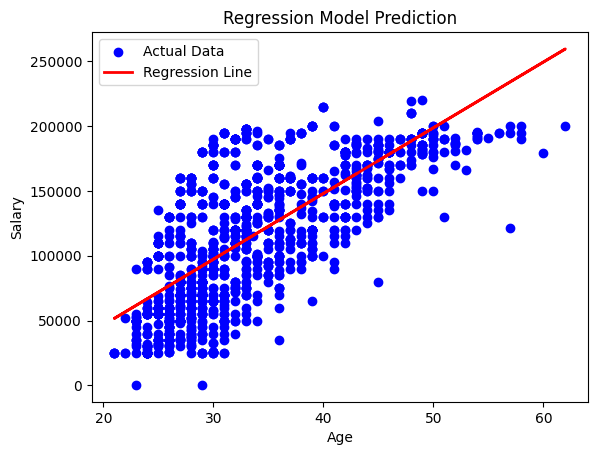

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#import pandas as pd
data = pd.read_csv("/content/Salary_Data.csv")  # Ensure the file is in the same folder as the notebook
print(data.head())  # Check if the data is loaded correctly


# Plotting the data
plt.scatter(data['Age'], data['Salary'], color='blue')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Salary vs Age')
plt.show()


# Check for non-numeric values
print(data.dtypes)

# TODO: Fill missing values in numerical columns with mean
#data = data.fillna(data.mean())
data.fillna(data.mean(numeric_only=True),inplace=True)


# Check for missing values in the dataset
print(data.isnull().sum())

# Splitting data into training and testing sets
X = data[['Age']]
y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared Value: {r2}")

# Visualizing the Regression Line
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.title('Regression Model Prediction')
plt.show()

# Interactive Input
while True:
    try:
        years_of_experience = float(input("Enter years of experience to predict salary: "))
        predicted_salary = model.predict([[years_of_experience]])[0]
        print(f"Predicted Salary: ${predicted_salary:.2f}")
    except ValueError:
        print("Invalid input! Please enter a numeric value.")
    except KeyboardInterrupt:
        print("\nExiting the program.")
        break
